In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect,  func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
#inspect measurement schema
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
#inspect station schema
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:
# Use `engine.execute` to select and display the first 10 rows from the emoji table
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [13]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

# Exploratory Climate Analysis

In [14]:
#select vacation dates: start date and end date
end_date = dt.date(2020, 1, 3)
start_date = end_date - dt.timedelta(days=365)
print("Start date is:", start_date)
print("End date is:", end_date)

Start date is: 2019-01-03
End date is: 2020-01-03


In [15]:

# Calculate the date 1 year ago from the last data point in the database
#inspect how the dates are formatted
sample_dates = session.query(Measurement.date).limit(5).all()
for result in sample_dates:
    print(result)

('2010-01-01',)
('2010-01-02',)
('2010-01-03',)
('2010-01-04',)
('2010-01-06',)


In [16]:
# get the date 1 year ago from last point in data base
# Latest Date and use that tocalculate one year ago
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print("the latest date in the databse is :",last_date )
last_date = dt.date(2017, 8, 3)
yearago_date = last_date - dt.timedelta(days=365)
print("one year ago from last date is:", yearago_date)

the latest date in the databse is : ('2017-08-23',)
one year ago from last date is: 2016-08-03


In [17]:
# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-03').\
    order_by(Measurement.date).all()


In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_df = pd.DataFrame(prcp_data, columns = ['date', 'precipitation'])
prcp_df.set_index('date', inplace = True)
prcp_df.head()
# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by = 'date')
prcp_df.head(20)


,precipitation
date,
2016-08-04,0.04
2016-08-04,0.62
2016-08-04,0.13
2016-08-04,0.25
2016-08-04,0.77
2016-08-04,NaN
2016-08-05,0.01
2016-08-05,0.03
2016-08-05,0.03


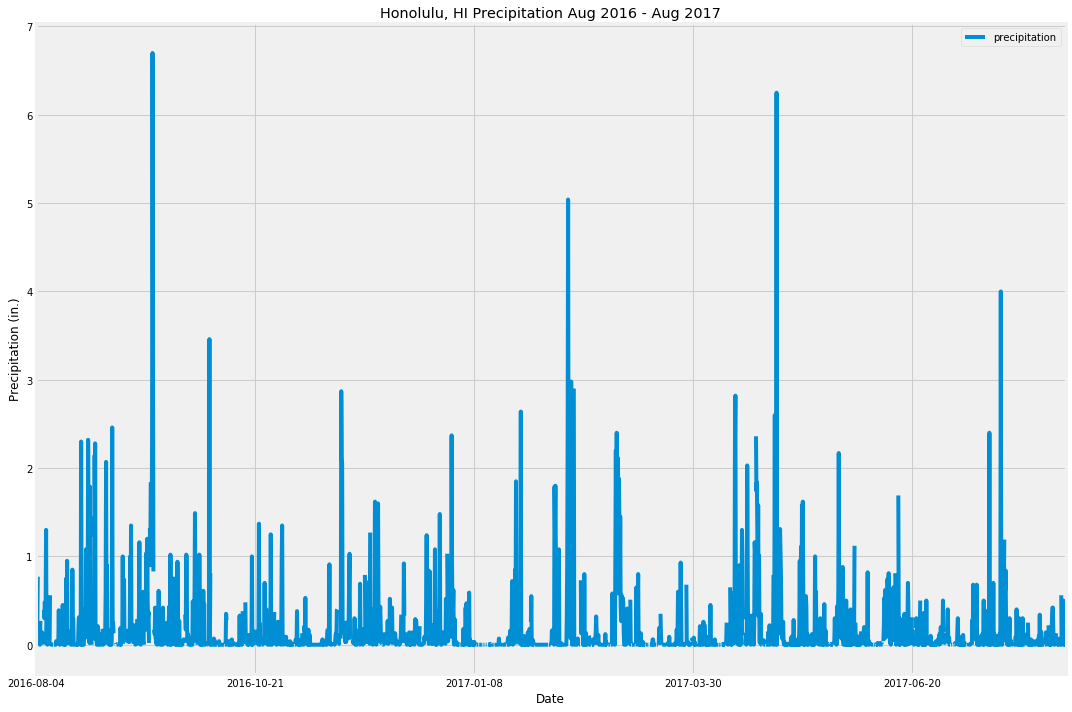

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data
#plot data
fig, ax = plt.subplots(figsize = (15, 10))
prcp_df.plot(ax = ax, x_compat = True)

#set title and labels
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (in.)')
ax.set_title("Honolulu, HI Precipitation Aug 2016 - Aug 2017")

#save figure
plt.savefig("Images/prcp.png")

#plot figure
plt.tight_layout()
plt.show()


In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2130.000000
mean,0.178995
std,0.458222
min,0.000000
25%,0.000000
50%,0.020000
75%,0.137500
max,6.700000


In [21]:
# Design a query to show how many stations are available in this dataset?
num_of_stations = session.query(Station.id).distinct().count()
num_of_stations

9

In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Station.station, func.count(Measurement.id)).select_from(Measurement).\
    join(Station, Measurement.station == Station.station).group_by(Station.station).\
    order_by(func.count(Measurement.id).desc()).all()

for result in active_stations:
    print(f"Station ID : {result[0]}\t Row Count: {result[1]}")


Station ID : USC00519281	 Row Count: 2772
Station ID : USC00519397	 Row Count: 2724
Station ID : USC00513117	 Row Count: 2709
Station ID : USC00519523	 Row Count: 2669
Station ID : USC00516128	 Row Count: 2612
Station ID : USC00514830	 Row Count: 2202
Station ID : USC00511918	 Row Count: 1979
Station ID : USC00517948	 Row Count: 1372
Station ID : USC00518838	 Row Count: 511


In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active_station = 'USC00519281'
temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()
temps

[(54.0, 85.0, 71.66378066378067)]

In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#get temperature data for most active station over final 12 months of data
yearoftemps = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == most_active_station).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= dt.date(2016, 8, 23)).all()

#save as a data frame
yearoftemps_df = pd.DataFrame(yearoftemps, columns = ['date', 'temperature'])
yearoftemps_df.set_index('date', inplace = True)
yearoftemps_df.head()

,temperature
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


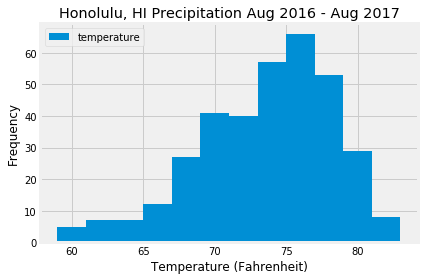

In [25]:
# plot the results as a histogram
fig, ax = plt.subplots()
yearoftemps_df.plot.hist(bins = 12, ax = ax)

#set labels
ax.set_xlabel('Temperature (Fahrenheit)')
ax.set_ylabel('Frequency')
ax.set_title("Honolulu, HI Precipitation Aug 2016 - Aug 2017")

#save figure
plt.savefig("temphisto.png")

#plot
plt.tight_layout()
plt.show()

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [27]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
#select vacation dates: start date and end date
end_date = dt.date(2017, 1, 3)
start_date = end_date - dt.timedelta(days=365)
print("Start date is:", start_date)
print("End date is:", end_date)

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
Temps = calc_temps('2016-01-04', '2017-01-03')
print(Temps)

Start date is: 2016-01-04
End date is: 2017-01-03
[(56.0, 74.14038128249567, 84.0)]


In [28]:
# Plot the results from your previous query as a bar chart. 

# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

tAVG=round(Temps[0][1], 2)
tMIN = Temps[0][0]
tMAX=Temps[0][2]
tAVG

74.14

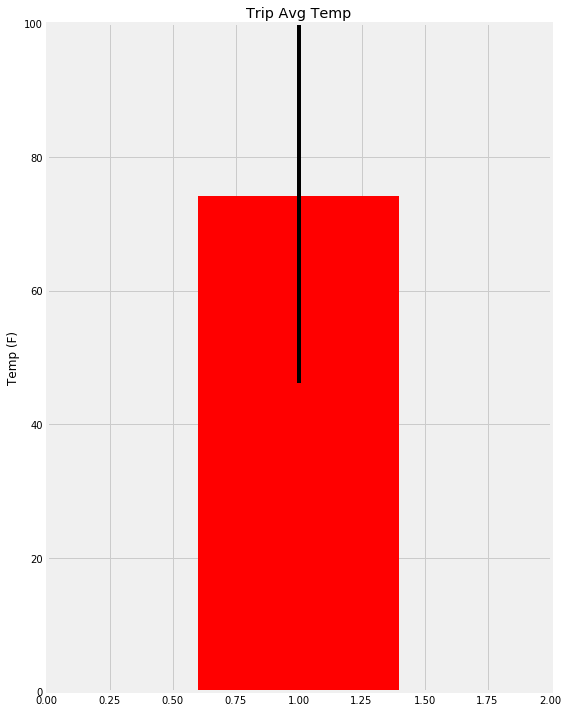

In [29]:
fig, ax = plt.subplots(figsize = (8, 10))

plt.bar( 1,tAVG, color = 'red', yerr = tMAX-tMIN, align='center')
plt.xlim(0, 2)
plt.ylim([0, 100])

plt.title('Trip Avg Temp')
plt.ylabel("Temp (F)")

#save fig
plt.savefig("Tripavg temp")

#show figure
plt.tight_layout()
plt.show()

In [32]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


yearly_rainfall = session.query(Station.station, Station.name, Station.latitude, Station.longitude,
                               Station.elevation, func.avg(Measurement.prcp)).\
    filter(Measurement.station == Station.station).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= dt.date(2016, 1, 4)).group_by(Station.station).\
    order_by(func.avg(Measurement.prcp).desc()).all()

#load into a dataframe
yearly_rainfall_df = pd.DataFrame(yearly_rainfall, columns = ['Station', 'Name', 'Latitude', 'Longitude', 
                                                              'Elevation', 'Avg. Precipitation (in.)'])

yearly_rainfall_df 

,Station,Name,Latitude,Longitude,Elevation,Avg. Precipitation (in.)
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.445250
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.211473
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.150852
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.113203
4,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.108018
5,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.077561
6,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.045364


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


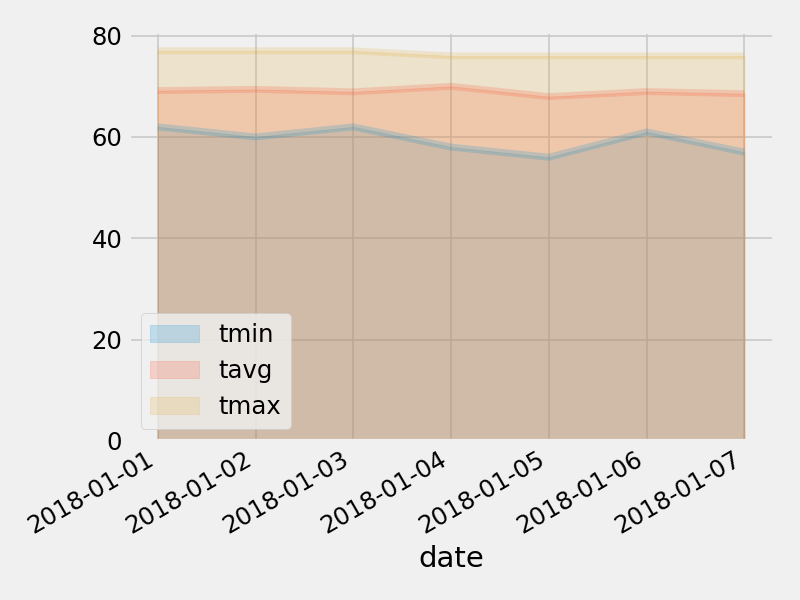

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
